# Latar Belakang Masalah

Dalam industri retail yang semakin kompetitif, pemahaman mendalam mengenai perilaku konsumen (consumer behavior) menjadi kunci utama untuk mempertahankan profitabilitas dan pangsa pasar. Supermarket sering kali mengumpulkan data transaksi dan demografis pelanggan dalam jumlah besar, namun data tersebut belum tentu dimanfaatkan secara optimal untuk pengambilan keputusan strategis.

Saat ini, Supermarket menghadapi tantangan dalam mengidentifikasi segmen pelanggan yang paling bernilai (high-value customers). Pendekatan pemasaran yang bersifat "satu untuk semua" sering kali tidak efisien dan memboroskan anggaran. Selain itu, faktor demografis seperti struktur usia dan tingkat pendapatan diduga kuat mempengaruhi pola belanja, namun belum dianalisis secara kuantitatif untuk penyesuaian strategi penjualan.

Oleh karena itu, diperlukan sebuah analisis data yang komprehensif untuk memetakan profil pelanggan, memahami preferensi produk berdasarkan karakteristik demografis, serta mengevaluasi kinerja kampanye pemasaran sebelumnya. Hasil dari analisis ini diharapkan dapat memberikan wawasan (actionable insights) bagi manajemen untuk merancang strategi pemasaran yang lebih terarah dan meningkatkan efisiensi penjualan.


## Pernyataan masalah:


Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

- Bagaimana profil demografis (usia, pendidikan, status pernikahan) dari segmen pelanggan dengan total belanja terbesar?

- Apakah Income mempengaruhi total belanja pelanggan?

- Kategori produk apa yang memberikan kontribusi pendapatan terbesar terhadap total penjualan supermarket?

- Kampanye pemasaran mana yang memiliki tingkat efektivitas tertinggi terhadap pengeluaran pelanggan?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Data Understanding

Sebelum memasuki tahap analisis, kita perlu memahami dataset secara lebih mendalam melalui proses data understanding. Dari tahap ini, kita dapat mengidentifikasi berbagai anomali yang terdapat dalam dataset dan menentukan penanganan yang diperlukan pada tahap data cleaning. Setiap penanganan anomali yang dilakukan akan disertai dengan justifikasi yang jelas, baik berdasarkan domain knowledge maupun pertimbangan statistik.

Berikut 5 baris teratas dan terbawah dari dataset supermarket.

In [3]:
df = pd.read_csv("Supermarket Customers.csv", delimiter="\t")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


##### 📑 Data Dictionary – Supermarket Customers

**People**

- ID: ID unik setiap pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan tahunan pelanggan
- Kidhome: Jumlah anak-anak di rumah tangga pelanggan
- Teenhome: Jumlah remaja di rumah tangga pelanggan
- Dt_Customer: Tanggal pelanggan mulai berbelanja di supermarket
- Recency: Hari terakhir pelanggan melakukan pembelian
- Complain: 1 jika pelanggan melayangkan keluhan di dua tahun terakhir, 0 jika tidak


**Produk**

- MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

**Promosi**

- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye ke-5, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

**Place**

- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan selama sebulan terakhir

Berdasarkan produk, status pernikahan dan tingkat edukasi yang ada di dalam data, agar penelitian lebih rapi, penulis akan menggunakan mata uang euro (€) untuk menggambarkan kolom seperti income maupun total pengeluaran.

In [4]:
df.info()
print(f'Jumlah data baris dan kolom adalah {df.shape}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


**🧮 Secara umum, kita bisa melihat bahwa:**

- Dataset Supermarket Customer memiliki ***29 kolom dan 2.240*** baris data pelanggan.

- Tipe data terbagi menjadi 25 kolom numerik integer, 3 kolom object/string (Education, Marital_Status, Dt_Customer), dan 1 kolom float (Income) yang memiliki missing values

- Perlu juga dilakukan perubahan tipe data seperti perubahan kolom ID dari integer ke string, dan mengubah kolom 'Dt_Customer' dari string ke datetime.

- Beberapa kolom penting antara lain: Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, serta pengeluaran tahunan (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds).

- Kolom ID berisi identitas unik pelanggan, sehingga tidak relevan untuk analisis langsung.

- Kolom Income memiliki 24 missing values (2216 non-null dari total 2240) sedangkan kolom lain tidak memiliki missing value.

- Kolom Year_Birth bisa digunakan untuk menghitung usia pelanggan, namun kemungkinan terdapat outlier. Year_Birth memiiki rentang 1893 – 1996 ada nilai lahir 1893 → usia 120+ → kemungkinan outlier. Rata-rata tahun lahir = 1968 (usia sekitar 55 tahun).

- Kolom Education dan Marital_Status adalah data kategorikal yang dapat digunakan untuk analisis segmentasi.

- Kolom Kidhome dan Teenhome menunjukkan jumlah anak kecil dan remaja di rumah, berguna untuk mengetahui preferensi belanja berdasarkan kondisi keluarga. Mayoritas pelanggan punya 0 anak: Kidhome & Teenhome median = 0.

- Kolom Recency menyatakan berapa hari terakhir pelanggan melakukan pembelian, bisa untuk analisis loyalitas pelanggan.

- Terdapat beberapa variabel kampanye (AcceptedCmp1 s/d AcceptedCmp5, serta Response) yang menunjukkan apakah pelanggan menerima penawaran promosi tertentu.

- Kolom Complain menandakan apakah pelanggan pernah melakukan komplain.

- Z_CostContact dan Z_Revenue memiliki nilai min=3 & 11 dan std=0 → nilai konstan, tidak berguna untuk analisis model dan sebaiknya di-drop.

In [6]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

**Berikut ringkasan garis besar isi data berdasarkan jumlah unik dan jenis nilai di setiap kolom:**

| Kategori                  | Kolom                     |  Nilai Unik | Keterangan Singkat                                       |
|---------------------------|---------------------------|-------------|----------------------------------------------------------|
| **Identitas**             | ID                        | 2.240       | Identifier unik pelanggan                                |
|                           | Year_Birth                | 59          | Tahun lahir: 1893 – 1996                                 |
| **Demografi**             | Education                 | 5           | Graduation, PhD, Master, 2n Cycle, Basic                 |
|                           | Marital_Status            | 8           | Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO |
|                           | Income                    | 1.974       | Nilai sangat bervariasi (~€1.700 – >€100.000)            |
| **Keluarga**              | Kidhome                   | 3           | Jumlah anak kecil: 0, 1, 2                               |
|                           | Teenhome                  | 3           | Jumlah remaja: 0, 1, 2                                   |
| **Enrollment & Recency**  | Dt_Customer               | 663         | Tanggal pertama menjadi pelanggan                        |
|                           | Recency                   | 100         | Hari sejak pembelian terakhir (0–99)                     |
| **Pengeluaran (2 tahun)** | MntWines                  | 776         | 0 – >1.400                                               |
|                           | MntFruits                 | 158         | 0 – ratusan                                              |
|                           | MntMeatProducts           | 558         | 0 – ratusan                                              |
|                           | MntFishProducts           | 182         | 0 – ratusan                                              |
|                           | MntSweetProducts          | 177         | 0 – ratusan                                              |
|                           | MntGoldProds              | 213         | 0 – ratusan                                              |
| **Perilaku Pembelian**    | NumDealsPurchases         | 15          | Pembelian pakai diskon: 0–15 kali                        |
|                           | NumWebPurchases           | 15          | Pembelian via web: 0–27 kali                             |
|                           | NumCatalogPurchases       | 14          | Pembelian via katalog: 0–28 kali                         |
|                           | NumStorePurchases         | 14          | Pembelian di toko fisik: 0–13 kali                       |
|                           | NumWebVisitsMonth         | 16          | Kunjungan web per bulan: 0–20                            |
| **Respons Kampanye**      | AcceptedCmp1 – AcceptedCmp5 | 2         | 0 = tidak terima, 1 = terima (5 kampanye sebelumnya)    |
|                           | Response                  | 2           | Respons kampanye terakhir (target variable)              |
| **Lain-lain**             | Complain                  | 2           | 0 = tidak ada keluhan, 1 = ada keluhan                   |
|                           | Z_CostContact             | 1           | Nilai konstan (3) → kolom teknis                         |
|                           | Z_Revenue                 | 1           | Nilai konstan (11) → kolom teknis                        |

**Catatan singkat**  
Dataset berisi profil lengkap 2240 pelanggan beserta riwayat pembelian di 6 kategori produk, pola pembelian melalui 4 channel (deal, web, katalog, toko), serta respons terhadap 6 kampanye pemasaran (5 historis + 1 kampanye terakhir sebagai target).

# Data Cleaning

#### copy data asli

In [7]:
# Membuat salinan dari data asli
df_clean = df.copy()

#### Ubah tipe data

In [8]:
# Mengubah tipe kolom ID ke string
df_clean["ID"] = df_clean["ID"].astype(str)

# Mengubah kolom 'Dt_Customer' dari string ke datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')

Beberapa kolom diubah tipenya agar sesuai dengan konten datanya. *Kolom Dt_Customer* dikonversi menjadi tipe *datetime* sehingga dapat digunakan untuk menghitung lama pelanggan terdaftar. meskipun isi dari *kolom ID* adalah numerik namun Kolom ID sebenarnya adalah identifier unik (bukan angka yang akan dihitung/dikalikan), sehingga lebih tepat berbentu *string*

#### Hapus kolom

Kolom Z_CostContact dan  Z_Revenue tidak diperlukan untuk analisa (nilainya sama untuk semua pelanggan).

In [9]:
# Menghapus kolom ('Z_CostContact' dan 'Z_Revenue')
df_clean.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

#### Merapikan nama kolom

Langkah ini bertujuan untuk memastikan tidak ada spasi berlebih pada nama kolom(jika ada maka spasi akan dihapus). Setelah dilakukan trimming, nama kolom menjadi lebih rapi dan konsisten. Hal ini mencegah error pada saat pemanggilan kolom di tahap analisis berikutnya.

Kolom dengan spasi di depan/belakang sudah bersih, tidak ada lagi anomali.

In [10]:
df.columns = df.columns.str.strip()
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

#### Cek Duplicated pada data

Dataset diperiksa untuk kemungkinan adanya duplikasi pada kolom ID. Jika ditemukan duplikat, hanya satu baris yang dipertahankan sementara sisanya dihapus. Langkah ini memastikan bahwa setiap pelanggan hanya tercatat sekali di dalam dataset.

In [11]:
# Mengecek apakah ada ID yang duplikat
df_clean[df_clean['ID'].duplicated(keep=False)]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


#### Cek Missing Value

In [12]:
# Mengecek jumlah nilai kosong per kolom
df_clean.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [13]:
# Menampilkan baris dengan nilai kosong di kolom 'Income'
df_clean[df_clean['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


Berdasarkan karakteristik data pelanggan, data pelanggan dengan kolom Income yang kosong adalah: **MNAR** *(Missing Not At Random)*.

Alasan:

- Data pendapatan **(Income)** adalah data sensitif
- Orang dengan pendapatan terlalu rendah atau terlalu tinggi bisa saja sengaja tidak mengisi

Jadi, hilangnya data itu berhubungan dengan nilai yang hilang itu sendiri (pendapatannya)
Maka dari itu nilai yang hilang pada pendapatan akan kita isi berdasarkan **median berdasarkan tingkat pendidikan** agar distribusi pendapatan tetap representatif, karena biasanya semakin tinggi tingkat pendidikan seseorang, semakin tinggi pendapatannya. 

Dengan cara ini, tidak ada baris yang hilang hanya karena adanya data kosong, dan dataset tetap konsisten.


In [14]:
df_clean.groupby('Education')[['Income']].median()

,Income
Education,
2n Cycle,46805.0
Basic,20744.0
Graduation,52028.5
Master,50943.0
PhD,55212.0


In [15]:
#Mengisi kolom Income yang kosong yang disesuaikan berdasarkan median dari kolom education
df_clean["Income"] = df_clean["Income"].fillna(df_clean.groupby("Education")["Income"].transform("median"))


# Melihat hasil pembersihan data
df_clean.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

# Data Transformation

#### Cek nilai unik pada kolom

In [16]:
df_clean["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Pada tahap ini dilakukan standarisasi data kategorikal agar lebih sesuai, dengan ringkasan dan alsan logis seperti dibawah ini:


| Nilai Asli     | Dirubah Menjadi     | Alasan|
|----------------|---------------------|-----------------------------------|
| **Married**    | Married             | Status resmi, dipertahankan apa adanya |
| **Together**   | → Married           | Tinggal bersama/pacaran serius → pola belanja & pengeluaran rumah tangga Di luar negeri **sangat mirip** dengan pasangan menikah |
| **Single**     | Single              | Sudah jelas, dipertahankan |
| **Alone**      | → Single            | Alone sangat identik dengan single, karena berarti belum memiliki pasanan |
| **YOLO**       | Dihapus seluruhnya  | Absurd dan tidak jelas masuk ke kategori apa, data sedikit, lebih baik dihapus |
| **Divorced**   | → Divorced/Widow    | Hidup sendiri lagi, pola belanja & pendapatan mirip dengan janda/duda, biasanya memiliki tanggungan anak |
| **Widow**      | → Divorced/Widow    | Hidup sendiri lagi, pola belanja & pendapatan mirip dengan Widow, beberapa sudah memiliki tanggungan anak |
| **Absurd**     | Dihapus seluruhnya  | Absurd dan tidak jelas masuk ke kategori apa, data sedikit, lebih baik dihapus |

In [17]:
# Mapping manual
mapping_marital = {
    'Married': 'Married',
    'Together': 'Married',
    'Single': 'Single',
    'Divorced': 'Divorced/Widow',
    'Widow': 'Divorced/Widow',
    'Alone': 'Single'
}

df_clean["Marital_Status"] = df_clean["Marital_Status"].replace(mapping_marital)

# Menghapus Baris dengan Marital_Status = 'Absurd' dan 'YOLO'
df_clean = df_clean[df_clean["Marital_Status"] != "Absurd"]
df_clean = df_clean[df_clean["Marital_Status"] != "YOLO"]

#Cek value terbaru dari kolom 'Marital_Status'
df_clean["Marital_Status"].value_counts()

Marital_Status
Married           1444
Single             483
Divorced/Widow     309
Name: count, dtype: int64

#### Menambah kolom baru yang diperlukan

Untuk membuat analisa menjadi lebih tajam dan efisien, kita perlu membuat beberapa variabel baru seperti dibawah ini:

1. **Age** dihitung dari Year_Birth agar model bisa menangkap pengaruh usia secara langsung (orang tua dan muda punya pola belanja sangat berbeda)
2. **Total_Spending** menjumlahkan semua kolom pengeluaran ```(MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds)``` karena total pengeluaran keseluruhan adalah salah satu prediktor terkuat terhadap respons kampanye, sekaligus memberikan gambaran yang lebih jelas tentang “nilai customer” dibandingkan melihat kategori produk secara terpisah
3. **Spending_Group** mengelompokan top 20% dari kolom total_spending pelanggan, ini berfungsi untuk membantu menjawab beberapa rumusan masalah yang ada 

In [18]:
from datetime import datetime
df_clean['Age'] = datetime.now().year - df_clean['Year_Birth']

mnt_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
df_clean['Total_Spending'] = df_clean[mnt_cols].sum(axis=1)

# Buat kategori High Spender (Top 20%)
threshold = df_clean['Total_Spending'].quantile(0.80)  # batas atas 20%
df_clean['Spending_Group'] = np.where(df_clean['Total_Spending'] >= threshold, 
                                'High Spender (Top 20%)', 
                                'Other (Bottom 80%)')





df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending,Spending_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,68,1617,High Spender (Top 20%)
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,71,27,Other (Bottom 80%)
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,60,776,Other (Bottom 80%)
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,41,53,Other (Bottom 80%)
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,44,422,Other (Bottom 80%)


#### Handling outlier

Berikut adalah pengecekan terhadap beberapa kolom penting yang memiliki indikasi outlier

In [19]:


# List kolom yang ingin dicek outlier
cols_to_check = ["Age", "Total_Spending", "Income"]

outlier_results = {}

for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    outlier_results[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Jumlah Outlier": len(outliers),
        "Index Outlier": outliers.index.tolist()
    }

# Tampilkan hasil
for col, result in outlier_results.items():
    print(f"\n=== OUTLIER CHECK: {col} ===")
    print(f"Lower Bound: {result['Lower Bound']}")
    print(f"Upper Bound: {result['Upper Bound']}")
    print(f"Jumlah Outlier: {result['Jumlah Outlier']}")



=== OUTLIER CHECK: Age ===
Lower Bound: 21.0
Upper Bound: 93.0
Jumlah Outlier: 3

=== OUTLIER CHECK: Total_Spending ===
Lower Bound: -1396.375
Upper Bound: 2508.625
Jumlah Outlier: 3

=== OUTLIER CHECK: Income ===
Lower Bound: -13678.375
Upper Bound: 117470.625
Jumlah Outlier: 8


#### Tampilkan Outlier pada kolom Age

In [20]:
# Ambil batas bawah dan atas outlier 
lower_age = outlier_results["Age"]["Lower Bound"]
upper_age = outlier_results["Age"]["Upper Bound"]

# Filter baris yang outlier
outliers_age = df_clean[(df_clean["Age"] < lower_age) | (df_clean["Age"] > upper_age)]

# Tampilkan hasil
outliers_age[["ID", "Age"]]



,ID,Age
192,7829,125
239,11004,132
339,1150,126


In [21]:
# Hapus baris Age outlier
df_clean = df_clean[~df_clean['Age'].isin([125, 126, 132])]


Umur manusia paling lama yang pernah tercatat adalah 122 tahun. Karena nilai 125, 126 dan 132 adalah mustahil (impossible value), data di baris tersebut (termasuk kolom lain seperti Total_spending, income, dll.) mungkin juga tidak valid. Menghapus baris ini sama dengan membersihkan data dari "sampah" yang bisa merusak analisis.

#### Tampilkan Outlier pada kolom Total_Spending

In [22]:

# Ambil batas bawah dan atas outlier 
lower_Total_Spending = outlier_results["Total_Spending"]["Lower Bound"]
upper_Total_Spending = outlier_results["Total_Spending"]["Upper Bound"]

# Filter baris yang outlier
outliers_Total_Spending = df_clean[(df_clean["Total_Spending"] < lower_Total_Spending) | (df_clean["Total_Spending"] > upper_Total_Spending)]

# Tampilkan hasil
outliers_Total_Spending[["ID", "Total_Spending"]]

,ID,Total_Spending
1179,5735,2525
1492,1763,2524
1572,5350,2525


Berdasarkan data di  atas, terdapat 3 outlier dengan range nilai 2524 - 2525 yang ditemukan pada data yang melebihi nilai upper bound(2507)  yang sudah di hitung. 

Selisih sebesar 18 poin ini sangat kecil relatif terhadap skala ribuan (2000-an). Data senilai 2525 secara statistik hampir identik dengan 2507. Ini bukan anomali ekstrem (seperti jika nilainya tiba-tiba 1.000.000). 

Dalam sisi bisnis nilai yang tinggi pada total_spending biasanya justru bernilai positif bagi bisnis. Data 2524 dan 2525 ini kemungkinan besar adalah pelakuan asli (valid) dari pelanggan, bukan error sistem atau kesalahan input. 

Dikarenakan alasan tersebut kami tidak melakukan penghapusan pada baris yang terdeteksi outlier pada kolom total_spending tersebut.


### Tampilkan Outlier pada kolom Income

In [23]:
# Ambil batas bawah dan atas outlier
lower_Income = outlier_results["Income"]["Lower Bound"]
upper_Income = outlier_results["Income"]["Upper Bound"]

# Filter baris yang outlier
outliers_Income = df_clean[(df_clean["Income"] < lower_Income) | (df_clean["Income"] > upper_Income)]

# Tampilkan hasil
outliers_Income[["ID", "Income"]]

,ID,Income
164,8475,157243.0
617,1503,162397.0
655,5555,153924.0
687,1501,160803.0
1300,5336,157733.0
1653,4931,157146.0
2132,11181,156924.0
2233,9432,666666.0


Di konteks negara maju (seperti Amerika Serikat, Swiss, Singapura, atau Australia), pendapatan tahunan sebesar €150,000 - €163,000 (sekitar IDR 2,3 - 2,5 Miliar per tahun) adalah angka yang wajar untuk beberapa level perusahaan.

Meskipun Upper Bound hitungan statistik adalah 117.405, angka 150k-160k hanyalah "High Earners" (berpenghasilan tinggi), bukan data yang salah. Sehingga saya memutuskan untuk tidak menghapus outlier dengan range nilai 153924.0 - 162397.0.

In [24]:
df_clean = df_clean[df_clean['Income'] != 666666.0]


Data bernilai 666.666 adalah cerita yang berbeda. Ini sangat mencurigakan karena termasuk data ekstrim dan memiliki pola yang unik, analisa saya angka itu kemungkinan disebabkan karena adanya typo, data entry error, ataupun human error.
Oleh sebab itu saya memutuskan untuk **menghapus kolom tersebut**.

In [25]:
df_clean.to_excel("Supermarket_cleaned_Final.xlsx", index=False)

# Exploratory Data Analysis (EDA)

##### Statistik Deskriptif Umum

Setelah melakukan proses Data Cleaning dan Data Transformation, kita perlu melakukan pengecekan kembali terhadap statistika deskriptif terhadap data yang sudah diolah tersebut, kita perlu cek kembali Min, Median, Mean dan Max

In [26]:
df_clean.describe().T[["min", "50%", "mean", "max"]]

,min,50%,mean,max
Year_Birth,1940.0,1970.0,1968.888889,1996.0
Income,1730.0,51445.5,51942.113575,162397.0
Kidhome,0.0,0.0,0.444892,2.0
Teenhome,0.0,0.0,0.50672,2.0
Dt_Customer,2012-07-30 00:00:00,2013-07-08 12:00:00,2013-07-10 11:21:17.419354880,2014-06-29 00:00:00
Recency,0.0,49.5,49.154122,99.0
MntWines,0.0,173.0,304.065412,1493.0
MntFruits,0.0,8.0,26.244624,199.0
MntMeatProducts,0.0,67.0,166.957885,1725.0
MntFishProducts,0.0,12.0,37.415771,259.0


##### Cek Distribusi terhadapa kolom penting yang akan digunakan untuk analisa

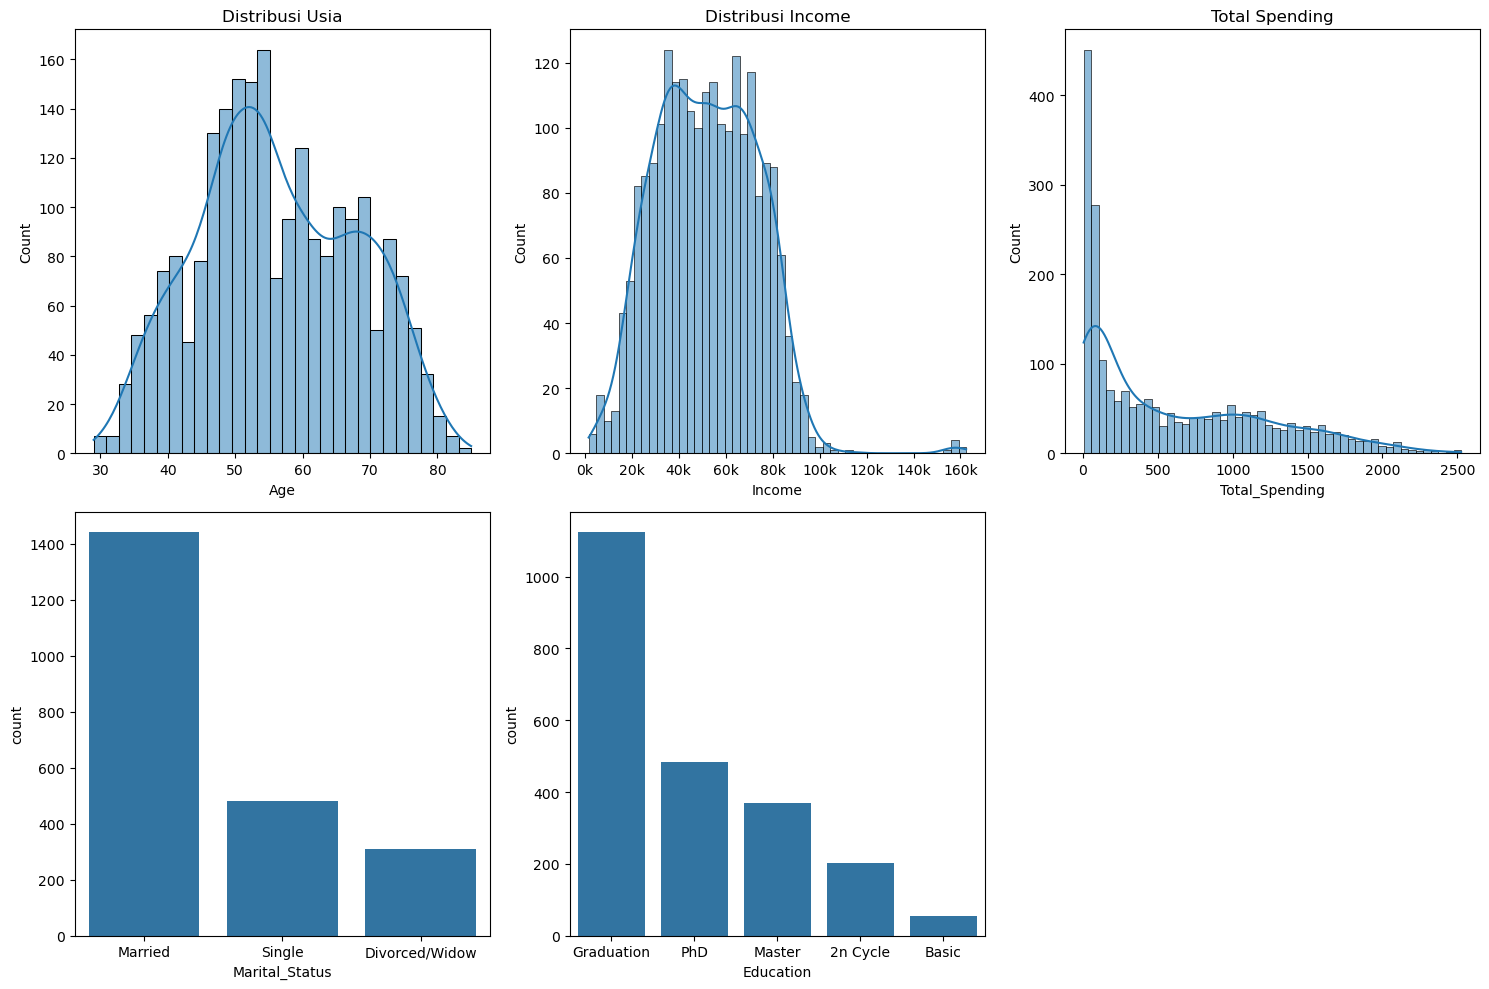

In [27]:
import matplotlib.ticker as mticker

plt.figure(figsize=(15,10))
plt.subplot(2,3,1); sns.histplot(df_clean['Age'], kde=True, bins=30); plt.title('Distribusi Usia')
plt.subplot(2,3,2) 
ax = sns.histplot(df_clean['Income'], kde=True, bins=50) 
ax.xaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{x/1000:.0f}k' if x < 1_000_000 else f'{x/1_000_000:.1f}M'
))
plt.title('Distribusi Income')
plt.subplot(2,3,3); sns.histplot(df_clean['Total_Spending'], kde=True, bins=50); plt.title('Total Spending')
plt.subplot(2,3,4); sns.countplot(data=df_clean, x='Marital_Status', order=df_clean['Marital_Status'].value_counts().index)
plt.subplot(2,3,5); sns.countplot(data=df_clean, x='Education', order=df_clean['Education'].value_counts().index)
plt.tight_layout()

Text(0.5, 1.0, 'Status Pernikahan Pelanggan High Spender (Top 20%)')

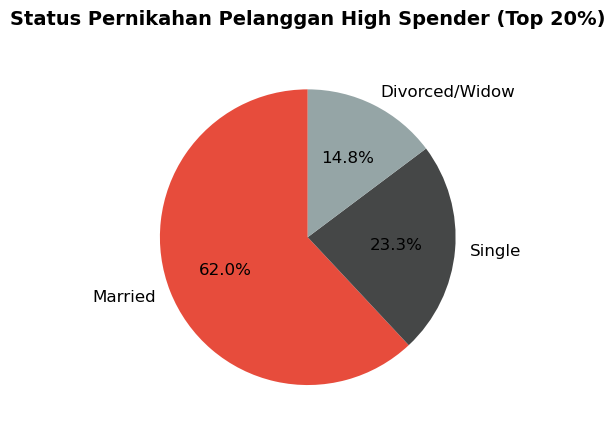

In [51]:
high_spender = df_clean[df_clean['Spending_Group'] == 'High Spender (Top 20%)']
marital_counts = high_spender['Marital_Status'].value_counts()

plt.pie(marital_counts, 
        labels=marital_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors = sns.color_palette([ '#e74c3c',"#454747", '#95a5a6']),
        textprops={'fontsize': 12})
plt.title('Status Pernikahan Pelanggan High Spender (Top 20%)', 
          fontsize=14, fontweight='bold', pad=20)

##### Berikut penjelasan satu per satu dari keenam grafik di atas.

1. **Distribusi Usia (Age)**

**Penjelasan Grafik**
Distribusi usia pelanggan berbentuk hampir normal (bell-shaped) dengan puncak di usia 48–58 tahun. Rentang usia setelah pembersihan outlier adalah 29–81 tahun, rata-rata 56 tahun, dan mayoritas pelanggan berada di rentang 45–70 tahun (baby boomer dan generasi X tua).

**Insight Bisnis**
Pelanggan inti supermarket ini adalah orang dewasa paruh baya hingga lansia, bukan milenial atau Gen-Z. Segmen lansia (60+) masih sangat signifikan (sekitar 30%). Artinya, kanal offline (toko fisik dan katalog cetak) tetap harus dijaga kuat karena segmen ini kurang aktif secara digital.

2. **Distribusi Income**

**Penjelasan Grafik**
Pendapatan tahunan sangat right-skewed (banyak pelanggan berpenghasilan menengah, sedikit yang sangat tinggi). Median income ≈ 51.445, rata-rata ≈ 52.000, dengan ekor panjang hingga > 160.000. kurang lebih 10% pelanggan memiliki income > 84.000 per tahun.

**Insight Bisnis**
Supermarket ini melayani segmen menengah-atas hingga kelas atas. Strategi premium pricing dan produk high-margin (wine, daging premium) sangat tepat untuk segmen ini.


3. **Total Spending (Pengeluaran Total 2 Tahun)**

**Penjelasan Grafik**
Distribusi sangat right-skewed. Mayoritas pelanggan menghabiskan < €500 (median ≈ €396), tetapi ada segelintir yang menghabiskan > €2.000. Rata-rata Total Spending ≈ €605, namun sekitar 25% pelanggan menghabiskan > €1.000.

**Insight Bisnis** 
Fokus utama bisnis harus mempertahankan, meningkatkan loyalitas, dan menambah jumlah pelanggan di ekor kanan ini.

4. **Marital Status (Setelah Dibersihkan)**

**Penjelasan Grafik**

Married           1444
Single             483
Divorced/Widow     309

**Insight Bisnis**
Mayoritas pelanggan adalah pasangan (menikah atau tinggal bersama). Segmen single dan janda/duda jauh lebih kecil. Artinya, promosi paket keluarga (bundling wine + meat untuk dinner romantis atau acara keluarga) akan sangat relevan bagi 1444 pelanggan ini.


5. **Tingkat Pendidikan (Education)**

**Penjelasan Grafik**
Graduation (Sarjana): ≈ 50% → terbanyak
PhD: ≈ 22%
Master: ≈ 16%
2n Cycle: ≈ 9%
Basic: < 3%

**Insight Bisnis**
Pelanggan supermarket ini sangat berpendidikan tinggi — hampir tidak ada pelanggan dengan pendidikan rendah. Ini menegaskan positioning supermarket sebagai toko premium/upscale, bukan supermarket massal. Komunikasi marketing harus menggunakan bahasa yang cerdas, elegan, dan berwawasan.

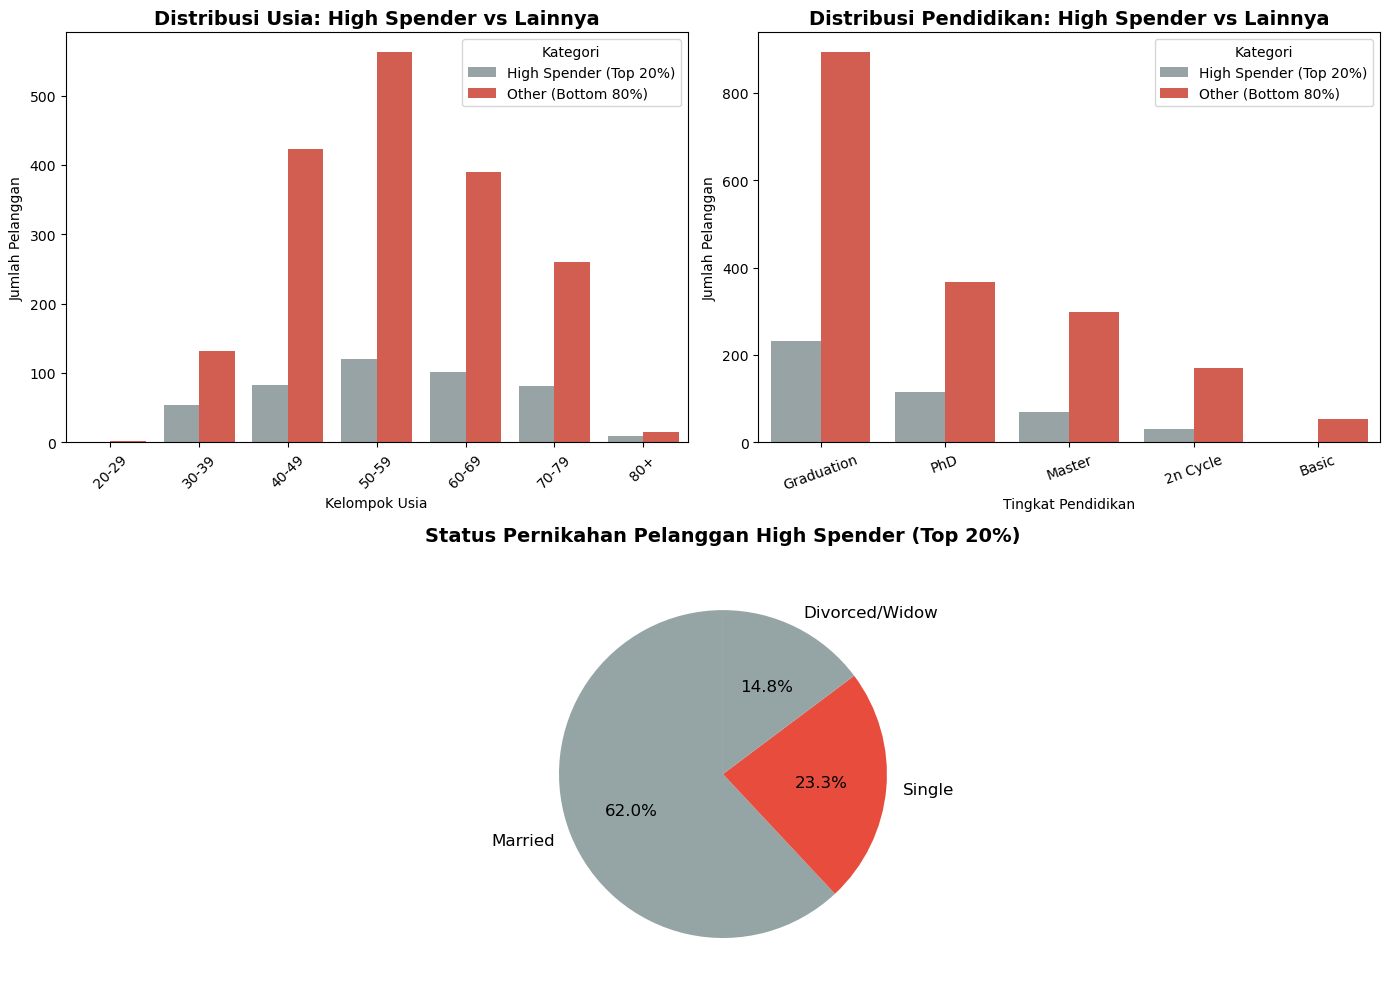

In [28]:
# 1. Visualisasi Distribusi Usia (Barplot per kelompok umur)
plt.figure(figsize=(14, 10))

# Bagi umur menjadi bin (kelompok umur)
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

plt.subplot(2, 2, 1)
sns.countplot(data=df_clean, x='Age_Group', hue='Spending_Group', palette=['#95a5a6', '#e74c3c'])
plt.title('Distribusi Usia: High Spender vs Lainnya', fontsize=14, fontweight='bold')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Kategori')
plt.xticks(rotation=45)

# 2. Visualisasi Distribusi Pendidikan
plt.subplot(2, 2, 2)
order_edu = df_clean['Education'].value_counts().index
sns.countplot(data=df_clean, x='Education', hue='Spending_Group', order=order_edu, palette=['#95a5a6', '#e74c3c'])
plt.title('Distribusi Pendidikan: High Spender vs Lainnya', fontsize=14, fontweight='bold')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Kategori')
plt.xticks(rotation=20)

# 3. Visualisasi Pie Chart Marital Status KHUSUS High Spender
plt.subplot(2, 2, (3,4))  # mengambil 2 kolom di baris bawah
high_spender = df_clean[df_clean['Spending_Group'] == 'High Spender (Top 20%)']
marital_counts = high_spender['Marital_Status'].value_counts()

plt.pie(marital_counts, 
        labels=marital_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors = sns.color_palette(['#95a5a6', '#e74c3c']),
        textprops={'fontsize': 12})
plt.title('Status Pernikahan Pelanggan High Spender (Top 20%)', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


#### Penjelasan Hasil Ketiga Visualisasi (Rumusan Masalah 1: Profil Demografis High Spender – Top 20%)
Berdasarkan tiga visualisasi yang dihasilkan, profil demografis pelanggan ```High Spender``` (20% teratas berdasarkan total belanja) sudah terlihat sangat jelas. Dari segi usia, terjadi persebaran yang cukup merata dari pelanggan berusia **30 sampai 79 tahun**, namun nilai tertinggi didapatkan dari usia ``50-59`` tahun, sementara pelanggan di bawah 30 tahun dan di atas 79 tahun sangat jarang masuk ke kelompok ini. Dari segi pendidikan, High Spender didominasi oleh lulusan ``Graduation`` (proporsi jauh lebih tinggi dibandingkan populasi keseluruhan) diikuti dengan ``phD`` , sedangkan tingkat pendidikan Master, 2n Cycle, memiliki proporsi yang kecil dari High Spender, terutama Basic hampir tidak ada di kelompok ini. Terakhir, dari status pernikahan, **62% High Spender adalah pasangan menikah/tinggal bersama (Married)**, diikuti 23,3% single dan hanya 14,8% yang bercerai atau janda/duda.


**Insight Bisnis**

High Spender supermarket ini bukanlah segmen massal, melainkan kelompok yang sangat spesifik: pasangan berusia 30–79 tahun, berpendidikan tinggi (terutama PhD dan sarjana), dan sebagian besar sudah menikah. Segmen ini adalah ``golden customer`` yang harus menjadi fokus utama semua aktivitas pemasaran

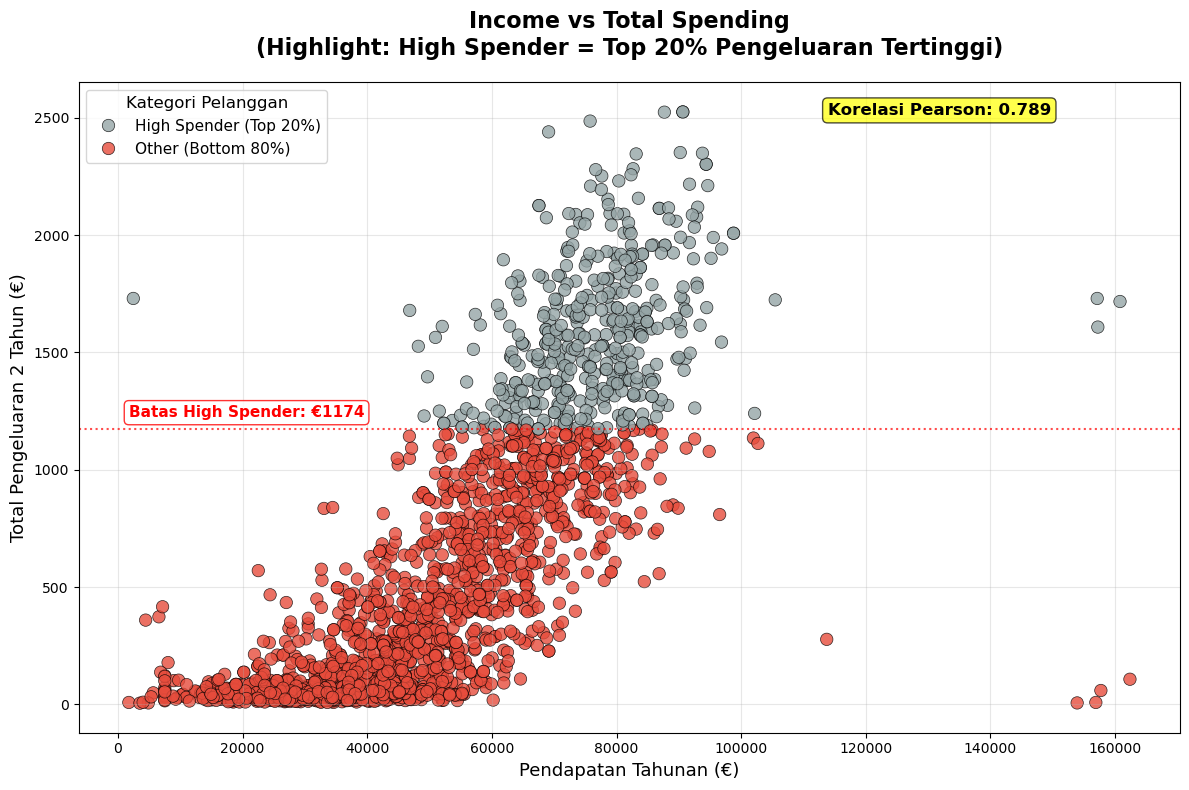

In [29]:
plt.figure(figsize=(12, 8))

# Scatter plot dengan hue berdasarkan Spending Group
sns.scatterplot(data=df_clean, 
                x='Income', 
                y='Total_Spending',
                hue='Spending_Group',
                palette=['#95a5a6', '#e74c3c'],  # abu-abu untuk biasa, merah untuk high spender
                alpha=0.8,
                s=80,  # ukuran titik
                edgecolor='black',
                linewidth=0.5)


# Styling profesional
plt.title('Income vs Total Spending\n(Highlight: High Spender = Top 20% Pengeluaran Tertinggi)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pendapatan Tahunan (€)', fontsize=13)
plt.ylabel('Total Pengeluaran 2 Tahun (€)', fontsize=13)
plt.legend(title='Kategori Pelanggan', title_fontsize=12, fontsize=11, loc='upper left')

# Tambahkan anotasi insight penting
plt.axhline(y=threshold, color='red', linestyle=':', alpha=0.7)
plt.text(x=df_clean['Income'].min(), y=threshold + 50, 
         s=f'Batas High Spender: €{threshold:.0f}', 
         color='red', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="red", alpha=0.8))

# Korelasi Pearson
corr = df_clean['Income'].corr(df_clean['Total_Spending'])
plt.text(x=0.68, y=0.95, transform=plt.gca().transAxes,
         s=f'Korelasi Pearson: {corr:.3f}', 
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Penjelasan Hasil Visualisasi (Rumusan Masalah 2: Apakah Income mempengaruhi total belanja pelanggan?)

**Scatter plot** ```Income vs Total Spending``` menunjukkan hubungan yang sangat kuat dan positif antara pendapatan tahunan dengan total pengeluaran dalam 2 tahun terakhir, dengan ```korelasi Pearson sebesar 0,789 ```(menunjukan hasil korelasi yang sangat tinggi). Titik-titik merah (High Spender – top 20%) hampir seluruhnya terkonsentrasi pada pendapatan €60.000–€85.000 per tahun, dan semakin tinggi pendapatan maka semakin tinggi pula pengeluaran. Batas High Spender (**Total Spending ≥ €1.174**) ditandai dengan garis horizontal merah, dan terlihat jelas kebanyakan pelanggan berpendapatan rendah (**< €60.000**) berada di bawah batas High Spender. 

**Insight Bisnis**

Income adalah faktor penentu nomor 1 apakah seseorang akan menjadi High Spender atau bukan — hubungan ini begitu kuat dengan korelasi pearson 0,789. Dengan data ini maka kedepannya ``pemfokusan pelanggan baru bisa lebih di utamakan untuk pelanggan dengan pendapatan tinggi.`` 

                 RANKING KONTRIBUSI PENDAPATAN PRODUK                 
1. Fruits       : €  58,578  →    4.3%
2. Sweet        : €  60,485  →    4.5%
3. Fish         : €  83,512  →    6.2%
4. GoldProds    : €  97,854  →    7.2%
5. Meat         : € 372,650  →   27.6%
6. Wines        : € 678,674  →   50.2%
----------------------------------------------------------------------
Total Pendapatan Keseluruhan (2 Tahun): €1,351,753
Wine + Meat = 77.8% dari total


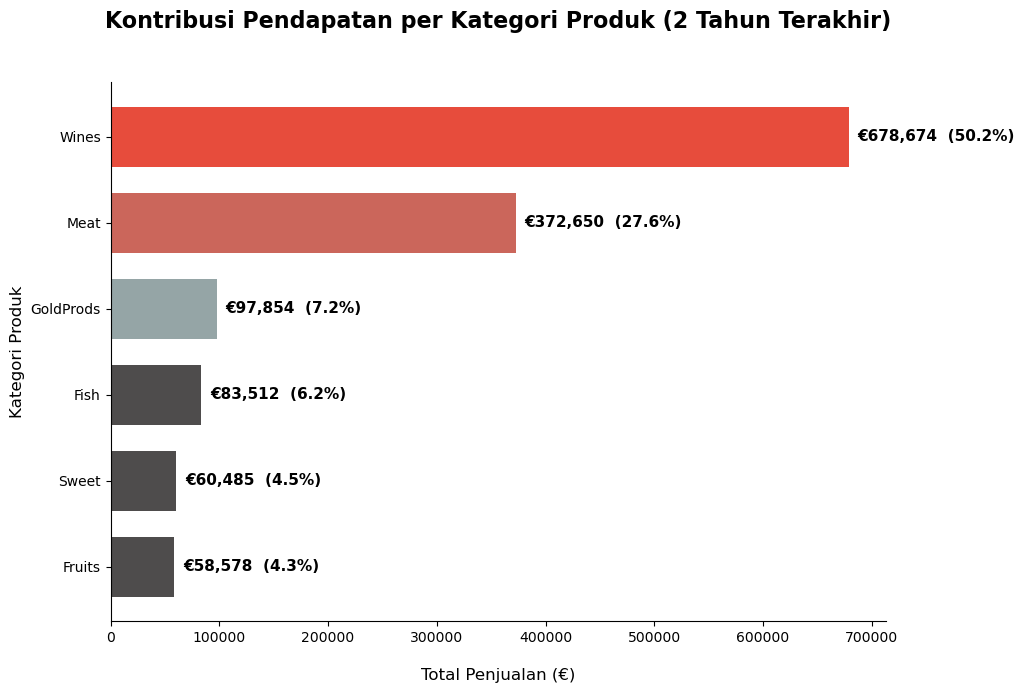

In [47]:
# Hitung total penjualan per kategori
total_sales = df_clean[mnt_cols].sum().sort_values(ascending=False)

# Hitung proporsi persentase
percentage = (total_sales / total_sales.sum() * 100).round(1)

# Gabungkan jadi satu DataFrame untuk visualisasi
sales_df_clean = pd.DataFrame({
    'Total_Penjualan (€)': total_sales,
    'Persentase (%)': percentage
})

# Urutkan dari terbesar
sales_df_clean = sales_df_clean.sort_values('Total_Penjualan (€)', ascending=True)

# === VISUALISASI HORIZONTAL BAR CHART ===
plt.figure(figsize=(10, 7))


# Warna custom: Wine & Meat menonjol
colors = ["#e74c3c" if x == 'MntWines' else 
          "#cb665b" if x == 'MntMeatProducts' else 
          "#95a5a6" if x == 'MntGoldProds' else 
          "#4E4C4C" for x in sales_df_clean.index]

bars = plt.barh(sales_df_clean.index.str.replace('Mnt', '').str.replace('Products', ''),
                sales_df_clean['Total_Penjualan (€)'], 
                color=colors, height=0.7)

# Tambahkan label nilai di ujung bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 8000, bar.get_y() + bar.get_height()/2,
             f'€{width:,.0f}  ({sales_df_clean["Persentase (%)"].iloc[i]}%)',
             va='center', fontsize=11, fontweight='bold', color='black')

# Styling profesional
plt.title('Kontribusi Pendapatan per Kategori Produk (2 Tahun Terakhir)\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('\nTotal Penjualan (€)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Hapus garis atas dan kanan
sns.despine()



# === OUTPUT RINGKASAN ===
print("="*70)
print("RANKING KONTRIBUSI PENDAPATAN PRODUK".center(70))
print("="*70)
for i, (cat, row) in enumerate(sales_df_clean.iterrows(), 1):
    produk = cat.replace('Mnt', '').replace('Products', '').strip()
    print(f"{i}. {produk:<12} : €{row['Total_Penjualan (€)']:>8,.0f}  →  {row['Persentase (%)']:>5}%")
print("-"*70)
print(f"Total Pendapatan Keseluruhan (2 Tahun): €{total_sales.sum():,.0f}")
print(f"Wine + Meat = {percentage["MntWines"] + percentage["MntMeatProducts"]:.1f}% dari total")
print("="*70)

#### Penjelasan Hasil Visualisasi (Rumusan Masalah 3: Kategori produk apa yang memberikan kontribusi pendapatan terbesar terhadap total penjualan supermarket??)

Berdasarkan data di atas bisa di simpulkan bahwa dari total ```pendapatan supermarket sebesar €1,35 juta dalam 2 tahun```, ```Wine menyumbang 50,2% dan Daging Premium 27,6%``` — artinya dua kategori ini saja menyumbang ```77,8% dari seluruh penjualan```. Empat kategori lainnya (Gold, Fish, Sweets, Fruits) hanya berkontribusi 22,4% secara total.

**Insight Bisnis:**

Supermarket ini bukan supermarket biasa, pelanggan menganggap Supermarket ini adalah Supermarket spesialis Wine dan Daging premium. Strategi bisnis harus sepenuhnya disesuaikan dengan fakta ini, 80–90% budget promosi, stok, dan``` kampanye harus difokuskan pada Wine dan Meat```.

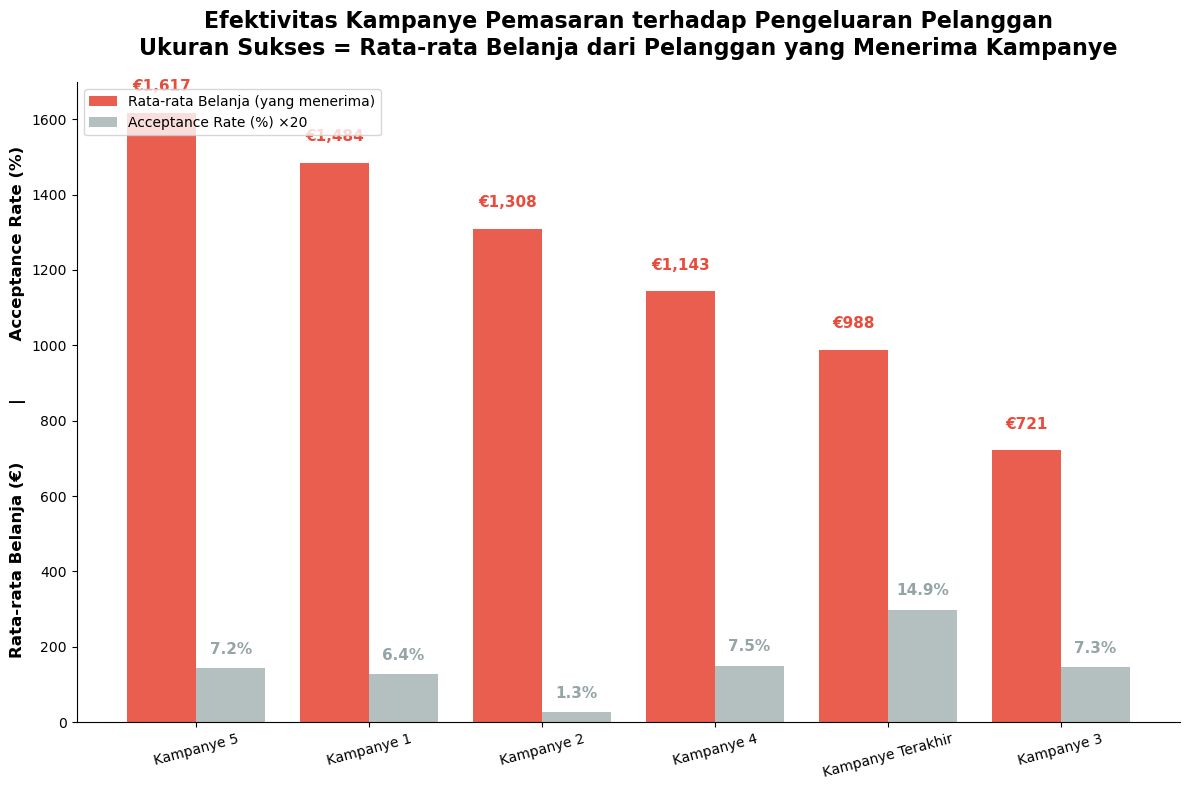

        RANKING EFEKTIVITAS KAMPANYE PEMASARAN (Berdasarkan Rata-rata Belanja)       
         Kampanye  Acceptance_Rate (%)  Avg_Spending_If_Accepted (€)  Total_Customers_Accepted
       Kampanye 5                  7.2                        1617.0                       161
       Kampanye 1                  6.4                        1484.0                       143
       Kampanye 2                  1.3                        1308.0                        30
       Kampanye 4                  7.5                        1143.0                       167
Kampanye Terakhir                 14.9                         988.0                       332
       Kampanye 3                  7.3                         721.0                       163


In [43]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Ganti nama biar lebih rapi
campaign_names = ['Kampanye 1', 'Kampanye 2', 'Kampanye 3', 
                  'Kampanye 4', 'Kampanye 5', 'Kampanye Terakhir']

# 1. Hitung Acceptance Rate (% yang menerima)
acceptance_rate = df_clean[campaign_cols].mean() * 100

# 2. Hitung Rata-rata Total Spending dari pelanggan yang MENERIMA kampanye
avg_spending_accepted = []
for col in campaign_cols:
    accepted = df_clean[df_clean[col] == 1]
    avg_spending_accepted.append(accepted['Total_Spending'].mean())

# Buat DataFrame hasil
result = pd.DataFrame({
    'Kampanye': campaign_names,
    'Acceptance_Rate (%)': acceptance_rate.round(1).values,
    'Avg_Spending_If_Accepted (€)': np.round(avg_spending_accepted, 0),
    'Total_Customers_Accepted': df_clean[campaign_cols].sum().values
})

# Urutkan berdasarkan Avg Spending (yang paling penting untuk profit!)
result = result.sort_values('Avg_Spending_If_Accepted (€)', ascending=False).reset_index(drop=True)

# === VISUALISASI TERBAIK: DUAL BAR CHART + ANNOTATION ===
fig, ax1 = plt.subplots(figsize=(12, 8))


# Bar 1: Rata-rata Spending (prioritas utama)
bars1 = ax1.bar(np.arange(len(result)) - 0.2, 
                result['Avg_Spending_If_Accepted (€)'], 
                width=0.4, color='#e74c3c', label='Rata-rata Belanja (yang menerima)', alpha=0.9)

# Bar 2: Acceptance Rate
bars2 = ax1.bar(np.arange(len(result)) + 0.2, 
                result['Acceptance_Rate (%)'] * 20,  # dikali 20 supaya skalanya masuk
                width=0.4, color='#95a5a6', label='Acceptance Rate (%) ×20', alpha=0.7)

# Tambahkan label nilai di atas bar
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Spending
    ax1.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 50,
             f'€{int(bar1.get_height()):,}', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, color="#e74c3c")
    # Acceptance Rate (kembali ke skala asli)
    rate = result.iloc[i]['Acceptance_Rate (%)']
    ax1.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 30,
             f'{rate}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, color='#95a5a6')

# Styling
ax1.set_ylabel('Rata-rata Belanja (€)          |          Acceptance Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Efektivitas Kampanye Pemasaran terhadap Pengeluaran Pelanggan\n'
              'Ukuran Sukses = Rata-rata Belanja dari Pelanggan yang Menerima Kampanye', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(np.arange(len(result)))
ax1.set_xticklabels(result['Kampanye'], rotation=15)
ax1.legend(loc='upper left')


sns.despine()
plt.tight_layout()
plt.show()

# === TABEL HASIL LENGKAP ===
print("="*85)
print("RANKING EFEKTIVITAS KAMPANYE PEMASARAN (Berdasarkan Rata-rata Belanja)".center(85))
print("="*85)
print(result.to_string(index=False))
print("="*85)


#### Penjelasan Hasil Visualisasi (Rumusan Masalah 4: Kampanye pemasaran mana yang memiliki tingkat efektivitas tertinggi terhadap pengeluaran pelanggan?)

Dari keenam kampanye, berdasarkan visualisasi di atas, Kampanye 5 adalah yang paling efektif. Pelanggan yang menerima kampanye ini memiliki rata-rata belanja ```€1.617```. Meskipun kampanye terakhir memiliki *total Acceptance Rate yang paling tinggi*, namun rata-rata total belanja pelanggan yang menerima kampanye tersebut termasuk rendah. Sedangkan kampanye 2 memiliki *total Acceptance Rate yang paling rendah*, meskipun rata-rata total belanja pelanggan yang menerima kampanye tersebut tergolong tinggi.

**Insight Bisnis:**
Kampanye 5 adalah kampanye paling sukses dalam supermarket ini — setiap pelanggan yang menerimanya rata-rata menghabiskan lebih dari ```€1.600``` di supermarket ini, tanpa perlu pertimbangan mendalam seharusnya kampanye ini bisa lebih sering dilakukan kedepannya. Sedangkan perlu ada evaluasi terhadap kampanye terakhir, meskipun kampanye terakhir tergolong sangat menarik karena memiliki *total Acceptance Rate yang paling tinggi*, namun total belanja pelanggan yang menerima kampanye tersebut masih sangat rendah. Selain itu kampanye 2 harus di evaluasi agar lebih menarik di mata pelanggan sehingga kedepannya bisa memiliki total Acceptance Rate yang tinggi.

# Kesimpulan

Berdasarkan analisis terhadap 2.237 pelanggan supermarket (setelah proses cleaning dan transformasi data), berikut adalah temuan utama yang menjawab seluruh rumusan masalah:

1. **Profil Demografis High Spender (Top 20%).**

Segmen pelanggan dengan total belanja tertinggi (20% teratas) memiliki karakteristik yang sangat spesifik dan berbeda signifikan dari populasi keseluruhan:
- Usia: Meskipun persebearan hampir merata di usia 30-79 namun dominan ada pada rentang 40–69 tahun, dengan puncak tertinggi pada kelompok usia 50–59 tahun. Pelanggan di bawah 30 tahun dan di atas 79 tahun hampir tidak ada dalam segmen ini.
- Pendidikan: Sangat didominasi oleh lulusan Graduation (Sarjana) dan PhD, sedangkan tingkat pendidikan Master dan 2n Cycle memiliki proporsi kecil, serta pendidikan Basic hampir tidak ada (kurang dari 1%).
- Status Pernikahan: 62% adalah pasangan menikah atau tinggal bersama (Married), 23,3% single, dan hanya 14,8% berstatus Divorced/Widow.
→ Segmen ini adalah kelompok berpendidikan tinggi, mapan secara finansial, dan mayoritas sudah berkeluarga.


2. **Pengaruh Pendapatan terhadap Total Belanja.**

Terdapat hubungan yang sangat kuat dan positif antara pendapatan tahunan (Income) dengan total pengeluaran pelanggan (Total Spending), ditunjukkan oleh koefisien korelasi Pearson sebesar 0,789. Hampir seluruh High Spender memiliki pendapatan tahunan di atas €60.000, dengan konsentrasi tertinggi pada rentang €60.000–€85.000. Pendapatan menjadi prediktor utama perilaku belanja tinggi.

3. **Kontribusi Pendapatan per Kategori Produk (2 Tahun Terakhir)**

Total pendapatan supermarket dari seluruh pelanggan mencapai €1,35 juta. Dua kategori produk mendominasi secara absolut:

- Wine: 50,2% (€678.000+)
- Daging Premium (Meat Products): 27,6%

→ Kedua kategori ini saja menyumbang 77,8% dari total penjualan, sementara empat kategori lainnya (Gold, Fish, Sweets, Fruits) hanya berkontribusi 22,2%.

4. **Efektivitas Kampanye Pemasaran**

Jika diukur dari rata-rata total belanja pelanggan yang menerima penawaran, peringkat kampanye adalah sebagai berikut:

* Kampanye 5: Paling efektif (€1.617 rata-rata belanja)
* Kampanye 1, 4, dan 2: Masih sangat baik (> €1.200)
* Kampanye Terakhir (Response): Memiliki acceptance rate tertinggi, tetapi rata-rata belanja terendah di antara semua kampanye
* Kampanye 2: Memiliki acceptance rate terendah, namun rata-rata belanja tinggi


# Saran Strategis (Actionable Recommendations)

1. **Segmentasi & Targeting pemasaran yang Tajam**

Fokuskan 80–90% sumber daya pemasaran dan akuisisi pelanggan baru pada segmen:

- Usia 40–69 tahun (prioritas 50–59 tahun)
- Berpendidikan tinggi (Sarjana & PhD)
- Sudah menikah/tinggal bersama
- Pendapatan tahunan ≥ €60.000
- Hindari penargetan massal ke Gen-Z atau kelompok berpendapatan rendah karena kontribusinya sangat kecil terhadap profit.

3. **Optimalkan Portofolio Produk**

Supermarket ini pada dasarnya adalah spesialis Wine & Premium Meat yang disamarkan sebagai supermarket umum.
- Alokasikan 80–90% ruang display, stok, promosi, dan budget pengadaan untuk kategori Wine dan Daging Premium.
- Kategori Fruits, Sweets, Fish, dan Gold hanya dipertahankan sebagai pendukung, bukan fokus utama.

4. **Replikasi Kampanye Terbaik**
- Jadikan Kampanye 5 sebagai template standar untuk semua kampanye mendatang — format ini terbukti mendorong pengeluaran tertinggi.
- Lakukan evaluasi mendalam terhadap Kampanye Terakhir: meskipun menarik banyak respons, namun tidak menghasilkan nilai belanja tinggi → kemungkinan terlalu generik atau terlalu murah.
- Tingkatkan daya tarik Kampanye 2 (sudah terbukti mendorong belanja tinggi) agar acceptance rate-nya meningkat.

5.**Strategi Kanal & Komunikasi**
- Pertahankan dan perkuat toko fisik dan katalog cetak — segmen utama (usia 50–69 tahun, berpendidikan tinggi) masih sangat aktif di kanal tradisional.
- Gunakan tone komunikasi yang premium, cerdas, dan berorientasi lifestyle keluarga mapan — hindari promosi diskon murahan yang menarik low-spender.

Dengan menerapkan keempat rekomendasi di atas, supermarket dapat meningkatkan efisiensi anggaran pemasaran secara drastis, mempertahankan dan memperluas segmen High Spender, serta memaksimalkan profitabilitas dengan memanfaatkan 20% pelanggan dan 2 kategori produk yang sudah terbukti menyumbang hampir 80% pendapatan.